In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To allow more flexible output. (see comments on Q4)
from IPython.display import display, Markdown, HTML

%matplotlib inline


# format for floats
pd.options.display.float_format = '{:,.2f}'.format

In [16]:
df_gdp = pd.read_csv('data/gdp_per_capita.csv').set_index('Country Name')
df_gender = pd.read_csv('data/gender_equality.csv').set_index('Country Name')
df_happ = pd.read_csv('data/2020.csv').set_index('Country name')

In [17]:
# Gender Equality separated by GENDER INEQUALITY INDEX and GENDER DEVELOPMENT INDEX
df_gender_GII = df_gender[df_gender['Indicator Code'] == 'GE_GII']
df_gender_GDI = df_gender[df_gender['Indicator Code'] == 'GE_GDI']

In [18]:
#df_gdp.dtypes
df_gdp = df_gdp.drop(columns=['Unnamed: 65'])

## Gender Inequality Index Comparison by Country

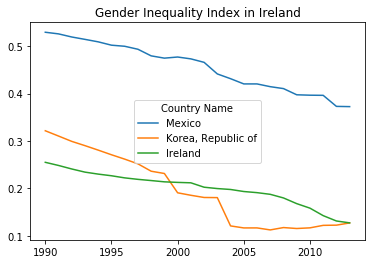

In [19]:
df_gender_GII_clean = df_gender_GII.T.drop(index=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

df_gender_GII_by_country = df_gender_GII[(df_gender_GII.index == 'Ireland') | (df_gender_GII.index == 'Mexico') | (df_gender_GII.index == 'Korea, Republic of')].T.drop(index=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

df_gender_GII_by_country.plot(title = 'Gender Inequality Index in Ireland')


## GDP per Capita and Gender Inequality Index in the United States

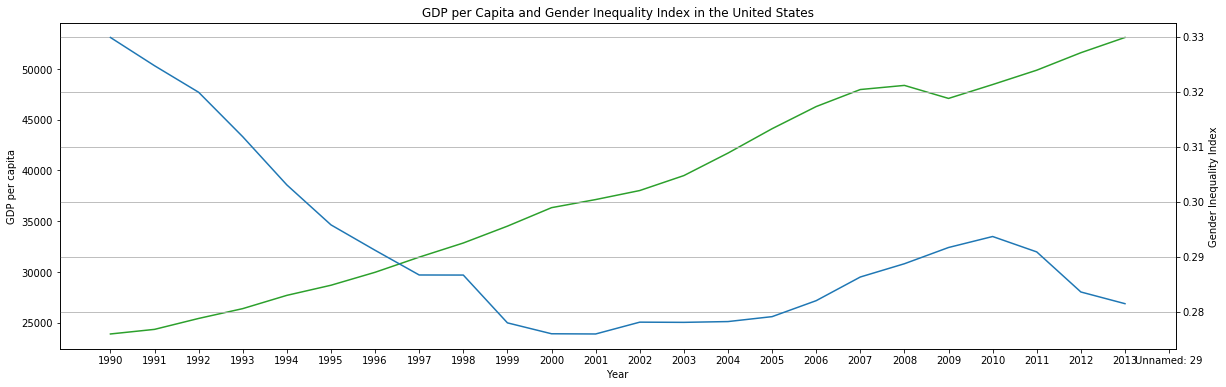

In [20]:
df_gdp_US = df_gdp[df_gdp.index == 'United States'].T.drop(index = ('Code'))
df_gdp_US = df_gdp_US.iloc[30:-7]

fig, ax1 = plt.subplots(figsize=(20, 6))

years = df_gender_GII_clean.index

ax1.set_xlabel('Year')
ax1.set_ylabel("GDP per capita", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.plot(df_gdp_US.index, df_gdp_US['United States'], color='tab:green', label = 'GDP per capita')

ax2 = ax1.twinx()
ax2.plot(df_gender_GII_clean['United States'].index, df_gender_GII_clean['United States'], label = 'GII')
ax2.set_ylabel("Gender Inequality Index", color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.grid(True)
plt.title('GDP per Capita and Gender Inequality Index in the United States')
plt.show()

## Happiness x GDP

In [21]:
#preprocessing

df_happ_renamed = df_happ.rename(columns={"Country name": "Country Name"})
display(df_happ_renamed.head())
df = pd.merge(df_happ_renamed, df_gdp, left_index=True, right_index=True, how='inner')
display(df)

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.81,0.03,7.87,7.75,10.64,0.95,71.90,0.95,-0.06,0.20,1.97,1.29,1.50,0.96,0.66,0.16,0.48,2.76
Denmark,Western Europe,7.65,0.03,7.71,7.58,10.77,0.96,72.40,0.95,0.07,0.17,1.97,1.33,1.50,0.98,0.67,0.24,0.50,2.43
Switzerland,Western Europe,7.56,0.04,7.63,7.49,10.98,0.94,74.10,0.92,0.11,0.30,1.97,1.39,1.47,1.04,0.63,0.27,0.41,2.35
Iceland,Western Europe,7.50,0.06,7.62,7.39,10.77,0.97,73.00,0.95,0.25,0.71,1.97,1.33,1.55,1.00,0.66,0.36,0.14,2.46
Norway,Western Europe,7.49,0.03,7.56,7.42,11.09,0.95,73.20,0.96,0.13,0.26,1.97,1.42,1.50,1.01,0.67,0.29,0.43,2.17


,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Finland,Western Europe,7.81,0.03,7.87,7.75,10.64,0.95,71.90,0.95,-0.06,...,"51,082.00","47,710.79","49,878.04","50,260.30","42,784.70","43,784.28","46,297.50","49,964.50","48,628.64","48,744.99"
Denmark,Western Europe,7.65,0.03,7.71,7.58,10.77,0.96,72.40,0.95,0.07,...,"61,753.65","58,507.51","61,191.19","62,548.98","53,254.86","54,664.00","57,610.10","61,591.93","59,775.74","61,063.32"
Switzerland,Western Europe,7.56,0.04,7.63,7.49,10.98,0.94,74.10,0.92,0.11,...,"91,254.03","86,547.67","88,109.49","89,684.71","84,776.14","83,073.28","83,352.09","86,388.40","85,334.52","87,097.04"
Iceland,Western Europe,7.50,0.06,7.62,7.39,10.77,0.97,73.00,0.95,0.25,...,"47,714.59","45,995.55","49,804.98","54,576.74","52,951.68","61,987.93","72,010.15","74,469.80","68,941.46","59,270.18"
Norway,Western Europe,7.49,0.03,7.56,7.42,11.09,0.95,73.20,0.96,0.13,...,"100,600.56","101,524.14","102,913.45","97,019.18","74,355.52","70,460.56","75,496.75","82,267.81","75,719.75","67,329.68"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,Sub-Saharan Africa,3.48,0.12,3.70,3.25,6.63,0.32,45.20,0.64,0.08,...,551.75,565.80,380.30,424.45,377.42,402.19,450.90,475.95,467.91,492.80
Rwanda,Sub-Saharan Africa,3.31,0.05,3.42,3.21,7.60,0.54,61.10,0.90,0.06,...,668.49,725.17,722.89,743.56,751.08,744.76,772.32,783.64,820.15,797.86
Zimbabwe,Sub-Saharan Africa,3.30,0.06,3.41,3.18,7.87,0.76,55.62,0.71,-0.07,...,"1,093.65","1,304.97","1,430.00","1,434.90","1,445.07","1,464.59","1,235.19","1,254.64","1,316.74","1,214.51"
South Sudan,Sub-Saharan Africa,2.82,0.11,3.03,2.61,7.43,0.55,51.00,0.45,0.02,...,"1,516.40","1,179.74","1,779.47","1,322.82","1,119.65",nan,nan,nan,nan,nan


Text(0.5, 1.0, 'Correlation between Happiness and Economy in 2020')

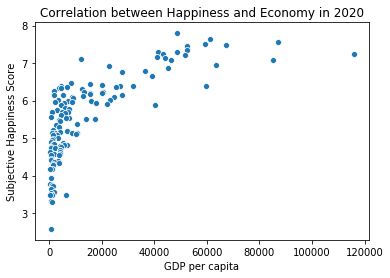

In [22]:
p = sns.scatterplot(data = df, x = "2020", y = "Ladder score")
p.set_xlabel("GDP per capita")
p.set_ylabel("Subjective Happiness Score")
p.set_title("Correlation between Happiness and Economy in 2020")

In [23]:
corr = df['Ladder score'].corr(df['2020'])
print(corr)

0.7234742106826753


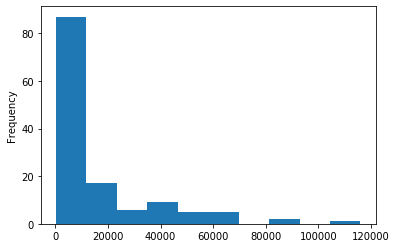

In [24]:
df['2020'].plot(kind='hist')

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
# log scale transformation of GDP-ppp-per-capita
df[['2020', "2019"]] = pt.fit_transform(df[['2020', "2019"]])

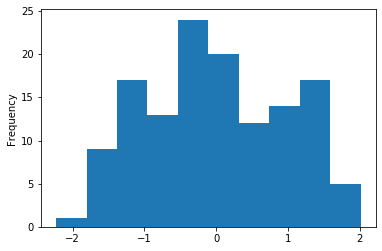

In [26]:
df['2020'].plot(kind='hist')

In [27]:
corr = df['Ladder score'].corr(df['2020'])
print(corr)

0.8425141949704316


Text(0.5, 1.0, 'Correlation between Happiness and Economy in 2020')

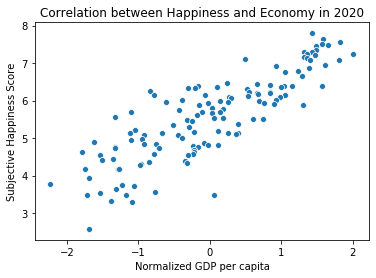

In [28]:
p = sns.scatterplot(data = df, x = "2020", y = "Ladder score")
p.set_xlabel("Normalized GDP per capita")
p.set_ylabel("Subjective Happiness Score")
p.set_title("Correlation between Happiness and Economy in 2020")